# Example of template fits

In [15]:
from nbi_stat import histo_pdf, scale_pdf, fit_plot, mle_fit, histogram, plot_hist, fit
from numpy import linspace, concatenate
from numpy.random import normal, exponential, uniform, seed 
from matplotlib.pyplot import legend

Set random seed

In [16]:
seed(42)

Created samples

In [17]:
backg_n  = 4000
unif_n   = 4000
signal_n = 4000
backg_x  = exponential(4,size=backg_n)
unif_x   = uniform    (0,10,size=unif_n)
signal_x = normal     (4,size=signal_n)

Bin the samples 

In [18]:
bins     = linspace(0 ,10 ,41)
backg_h  = histogram(backg_x , bins)
unif_h   = histogram(unif_x ,  bins)
signal_h = histogram(signal_x ,bins)

Plot the samples

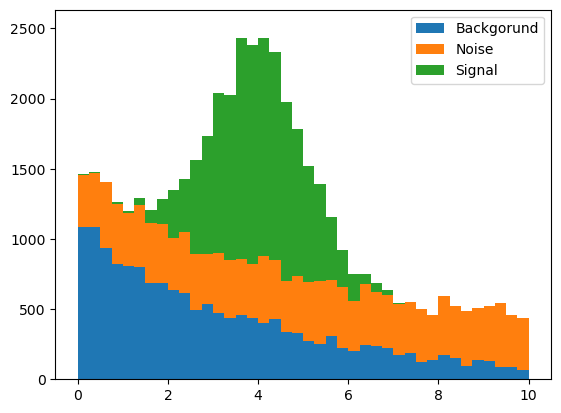

In [41]:
def plot_templates(pb=1,pn=1,ps=1,**kwargs):
    from numpy import zeros_like 
    base = zeros_like(backg_h[0])
    for p, h, n in zip((pb,pn,ps),
                       (backg_h,unif_h,signal_h),
                       ('Backgorund','Noise','Signal')):
        plot_hist(p * h[0], h[1], h[2], p * h[3], 
                  b = base,
                  as_bar=True,ecolor='none',label=n,**kwargs)
        base += p * h[0]

plot_templates()
legend();

Create data sample and histogram it. Background contribution is twice as large as in templates, and the signal is half the size of the template. 

In [42]:
data_x = concatenate((exponential(4,size=2*backg_n),
                      normal     (4,size=signal_n//2),
                      uniform    (0,10,size=unif_n)))
data_h = histogram(data_x ,bins)

Plot templates and data sample. 

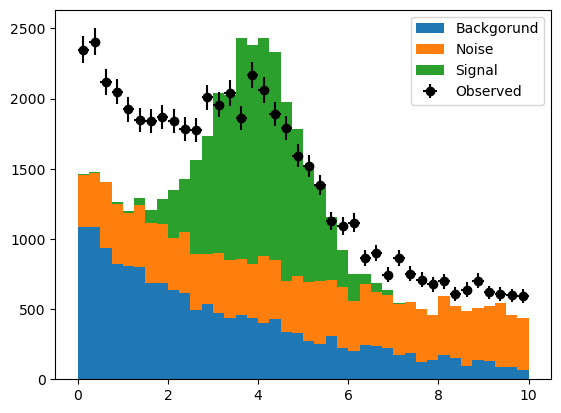

In [45]:
plot_templates()
plot_hist(*data_h, fmt='o', color='k', label='Observed')
legend();

Make template PDF. First from the background.

In [46]:
@scale_pdf()
def backg_f(x,h=histo_pdf(backg_h[1], backg_h[0], kind='nearest')):
    return h(x)

@scale_pdf()
def unif_f(x,h=histo_pdf(unif_h[1], unif_h[0], kind='nearest')):
    return h(x)

Then from the signal.

In [47]:
@scale_pdf()
def signal_f(x,h=histo_pdf(signal_h[1],signal_h[0],kind='nearest')):
    return h(x)

And finally the total PDF

In [48]:
def pdf(x,backg_a ,unif_a, signal_a):
    return backg_f(x,backg_a) + unif_f(x,unif_a) + signal_f(x,signal_a)

Now to our EB-MLE fit 

In [49]:
p, cov, opt = mle_fit(pdf ,(bins, data_h[0]) ,(1 ,1, 1) ,
                      extended=False ,poisson=True ,tol=1e-6,
                      options={'disp':True},full_output=True)
opt

Optimization terminated successfully.
         Current function value: 190.713187
         Iterations: 13
         Function evaluations: 82
         Gradient evaluations: 20


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 190.71318654893548
        x: [ 1.798e+00  1.158e+00  5.436e-01]
      nit: 13
      jac: [ 0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[ 1.860e-03 -1.287e-03 -4.776e-05]
            [-1.287e-03  1.837e-03 -4.235e-04]
            [-4.776e-05 -4.235e-04  3.589e-04]]
     nfev: 82
     njev: 20

Let us plot the result 

(<ErrorbarContainer object of 3 artists>,
 True,
 <matplotlib.legend.Legend at 0x7fbc8e7738d0>)

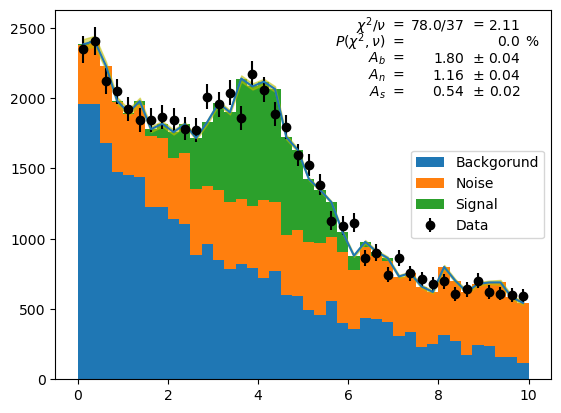

In [50]:
plot_templates(*p,fill='none')
fit_plot(data_h[1],data_h[0],data_h[3],pdf,p,cov,
         data_kw={'fmt':'o','color':'k','label':'Data'},
         parameters=['A_{b}','A_{n}','A_{s}'],
         legend={'loc':'right'})

Let's try a $\chi^2$ minimisation

In [53]:
p, cot = fit(pdf, data_h[1], data_h[0], (1 ,1, 1),
                  data_h[3]) 
p,cov

(array([1.80441633, 1.13521335, 0.5410267 ]),
 array([[ 1.86035173e-03, -1.28748030e-03, -4.77624618e-05],
        [-1.28748030e-03,  1.83687800e-03, -4.23458820e-04],
        [-4.77624618e-05, -4.23458820e-04,  3.58919899e-04]]))

(<ErrorbarContainer object of 3 artists>,
 True,
 <matplotlib.legend.Legend at 0x7fbc8de438d0>)

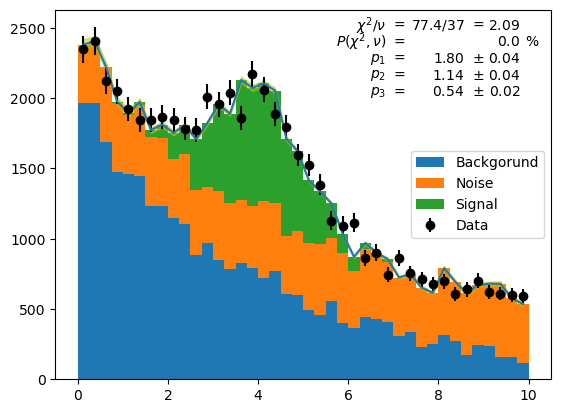

In [55]:
plot_templates(*p)
fit_plot(data_h[1],data_h[0],data_h[3],pdf,p,cov,
         data_kw={'fmt':'o','color':'k','label':'Data'},
         legend={'loc':'right'})